<a href="https://colab.research.google.com/github/manavkashyap2453-cell/Python-Libraries/blob/main/PANDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contents

1.   Series: Creating, Basic Operations
2.   Data Frame: Creating, Basic Operations
3.   Reading, Writing , Saving data to files
4.   Indexing and Selection: loc, iloc, boolean indexing
5.   Data Cleaning: Missing values, duplicates, renaming column
6.   Transformations: map(), apply(), applymap(), Vectorized operations
7.   Sorting and filtering: sort_values(), sort_index(), conditional filtering
8.   Grouping and Aggregation
9.   Reshaping
10.  Merging and joining
11.  Window functions
12.  String manipulation
13.  Date and Time
14.  MultiIndexing
15.  SQL to PANDAS



In [2]:
import numpy as np
import pandas as pd

# Series
A Series is a one-dimensional labeled array in Pandas.

* Think of it like a column in Excel or a single column in a DataFrame.

* It holds data + index:

Data → actual values (numbers, strings, etc.)

Index → labels for each value (default: 0,1,2,…)

**Creating a series**

In [3]:
# From a list
s1 = pd.Series([10, 20, 30, 40])
print(s1)

# From a dictionary (keys become index)
s2 = pd.Series({"a": 1, "b": 2, "c": 3})
print(s2)

# From a NumPy array
arr = np.array([100, 200, 300])
s3 = pd.Series(arr, index=["x", "y", "z"])
print(s3)

# From a scalar (repeated values)
s4 = pd.Series(5, index=["a", "b", "c"])
print(s4)


0    10
1    20
2    30
3    40
dtype: int64
a    1
b    2
c    3
dtype: int64
x    100
y    200
z    300
dtype: int64
a    5
b    5
c    5
dtype: int64


**Basic manipulation**

In [5]:
sr=pd.Series([1,2,3,4],index=['A','B','C','D'])
sr

,0
A,1
B,2
C,3
D,4


In [11]:
#Accessing
print(sr[2]) #by position
print(sr['A']) #by index
print(sr[['A','B']]) #by multiple index

3
1
A    1
B    2
dtype: int64


/tmp/ipython-input-4018775268.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(sr[2]) #by position


In [22]:
print(sr.loc['A']) #location
print(sr.iloc[0])  #indexed location

1
1


In [23]:
#Slicing: Same as numpy array
print(sr[1:3])

B    2
C    3
dtype: int64


In [14]:
#Vectorized operation
print(sr+2)

A    3
B    4
C    5
D    6
dtype: int64


In [15]:
#Basic functions
sr.min()

1

In [17]:
sr.max()

4

In [18]:
sr.describe()

,0
count,4.000000
mean,2.500000
std,1.290994
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


In [25]:
#Naming and renaming
s = pd.Series([10, 20, 30], name="MyNumbers")
print(s)
s.name='UpdatedNumbers'
print(s)

0    10
1    20
2    30
Name: MyNumbers, dtype: int64
0    10
1    20
2    30
Name: UpdatedNumbers, dtype: int64


In [27]:
#Change type
s=s.astype(np.float32)
print(s)

0    10.0
1    20.0
2    30.0
Name: UpdatedNumbers, dtype: float32


# Data Frame
* A DataFrame is a two-dimensional labeled data structure (rows + columns).

* Think of it like an Excel sheet or a SQL table.

* It’s essentially a collection of Series objects that share the same index.

In [29]:
#Creation

# From dictionary of lists: keys-> columns
df1 = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "City": ["NY", "LA", "Chicago"]
})
print(df1)

# From list of dictionaries:keys-> columns
data = [
    {"Name": "David", "Age": 40},
    {"Name": "Eva", "Age": 28}
]
df2 = pd.DataFrame(data)
print(df2)

# From NumPy array
arr = np.array([[1,2,3],[4,5,6]])
df3 = pd.DataFrame(arr, columns=["A","B","C"])
print(df3)



      Name  Age     City
0    Alice   25       NY
1      Bob   30       LA
2  Charlie   35  Chicago
    Name  Age
0  David   40
1    Eva   28
   A  B  C
0  1  2  3
1  4  5  6


In [30]:
# Column names are set at creation
print(df1.columns)

# Rename index
df1.index.name = "ID"
print(df1)

Index(['Name', 'Age', 'City'], dtype='object')
       Name  Age     City
ID                       
0     Alice   25       NY
1       Bob   30       LA
2   Charlie   35  Chicago


In [31]:
# Rename columns
df1 = df1.rename(columns={"Name": "FullName", "Age": "Years"})
print(df1)

# Rename index labels
df1 = df1.rename(index={0: "Row1", 1: "Row2"})
print(df1)


   FullName  Years     City
ID                         
0     Alice     25       NY
1       Bob     30       LA
2   Charlie     35  Chicago
     FullName  Years     City
ID                           
Row1    Alice     25       NY
Row2      Bob     30       LA
2     Charlie     35  Chicago


In [32]:
print(df1)

     FullName  Years     City
ID                           
Row1    Alice     25       NY
Row2      Bob     30       LA
2     Charlie     35  Chicago


In [41]:
#Accessing
print(df1['FullName']) #Column
print(df1[['Years','City']]) #Multiple columns

ID
Row1      Alice
Row2        Bob
2       Charlie
Name: FullName, dtype: object
      Years     City
ID                  
Row1     25       NY
Row2     30       LA
2        35  Chicago


In [45]:
print(df1.loc['Row1'])
print(df1['Years'].iloc[0])
print(df1['Years'].loc['Row1'])

FullName    Alice
Years          25
City           NY
Name: Row1, dtype: object
25
25


**0R1C: axis=0-> Row, axis=1-> Column**

Create a DataFrame of 3 students with columns: "Name", "Age", "Grade".

Rename "Grade" to "Marks".

Add a new column "Passed" with values True/False.

Rename the index to "StudentID" and set labels as S1, S2, S3.

In [49]:
data={
    "Name":['Alpha','Beta','Gamma'],
    "Age":['10','11','9'],
    "Grade":['A','B','C']
}
students=pd.DataFrame(data)
students

,Name,Age,Grade
0,Alpha,10,A
1,Beta,11,B
2,Gamma,9,C


In [52]:
students.rename(columns={"Grade":"Marks"},inplace=True)

In [53]:
students

,Name,Age,Marks
0,Alpha,10,A
1,Beta,11,B
2,Gamma,9,C


In [54]:
students["Passed"]=["True","False","False"]
students

,Name,Age,Marks,Passed
0,Alpha,10,A,True
1,Beta,11,B,False
2,Gamma,9,C,False


In [56]:
students.index = ["S1", "S2", "S3"]     # set labels
students.index.name = "StudentID"
students

,Name,Age,Marks,Passed
StudentID,,,,
S1,Alpha,10,A,True
S2,Beta,11,B,False
S3,Gamma,9,C,False


# Indeing and Selection

In [58]:
df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "City": ["NY", "LA", "Chicago"]
}, index=["S1","S2","S3"])
df.index.name = "StudentID"

print(df)

# Single row by label
print(df.loc["S1"])

# Multiple rows by labels
print(df.loc[["S1","S3"]])

# Specific cell (row + column)
print(df.loc["S2","Age"])

# Slice by labels: Note loc includes end label while slicing
print(df.loc["S1":"S2"])


              Name  Age     City
StudentID                       
S1           Alice   25       NY
S2             Bob   30       LA
S3         Charlie   35  Chicago
Name    Alice
Age        25
City       NY
Name: S1, dtype: object
              Name  Age     City
StudentID                       
S1           Alice   25       NY
S3         Charlie   35  Chicago
30
            Name  Age City
StudentID                 
S1         Alice   25   NY
S2           Bob   30   LA


In [59]:
# Single row by position
print(df.iloc[0])

# Multiple rows by positions
print(df.iloc[[0,2]])

# Specific cell (row + column)
print(df.iloc[1,1])   # row 1, column 1 → 30

# Slice by positions: Note-> iloc does not inlcude end while slicing
print(df.iloc[0:2, 0:2])  # first 2 rows, first 2 columns

Name    Alice
Age        25
City       NY
Name: S1, dtype: object
              Name  Age     City
StudentID                       
S1           Alice   25       NY
S3         Charlie   35  Chicago
30
            Name  Age
StudentID            
S1         Alice   25
S2           Bob   30


In [60]:
#Boolean indexig: Relate to SQL WEHRE clause

# Filter rows where Age > 28
print(df[df["Age"] > 28])

# Filter rows where City == "LA"
print(df[df["City"] == "LA"])

              Name  Age     City
StudentID                       
S2             Bob   30       LA
S3         Charlie   35  Chicago
          Name  Age City
StudentID               
S2         Bob   30   LA


# Transformations

In [65]:
#map()->Works on series. Applies a function, lambda or dictionary to each element

s = pd.Series([1, 2, 3, 4])

# Using a function(Transform values)
s=s.map(lambda x: x**2)
print(s)

# Using a dictionary (map values)
s=s.map({1: "One", 2: "Two", 3: "Three"})
print(s)

# Using a built-in function
s.map(str)

0     1
1     4
2     9
3    16
dtype: int64
0    One
1    NaN
2    NaN
3    NaN
dtype: object


,0
0,One
1,nan
2,nan
3,nan


In [70]:
#apply(): Works on data frame and series. On series behaves like map
s = pd.Series([1, 2, 3, 4])
df=pd.DataFrame({
    "A":[1,2,3],
    "B":[4,5,6]
})

# On Series
s=s.apply(lambda x: x + 10)
print(s)

# On DataFrame (column-wise)
print(df.apply(lambda col: col.max()))

# On DataFrame (row-wise)
print(df.apply(lambda row: row.sum(), axis=1))




0    11
1    12
2    13
3    14
dtype: int64
A    3
B    6
dtype: int64


,0
0,5
1,7
2,9


In [71]:
#applymap(): Works on data frame. Applies a function to each data element
# Apply function to every element
df.applymap(lambda x: x * 2)


/tmp/ipython-input-1277145135.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: x * 2)


,A,B
0,2,8
1,4,10
2,6,12


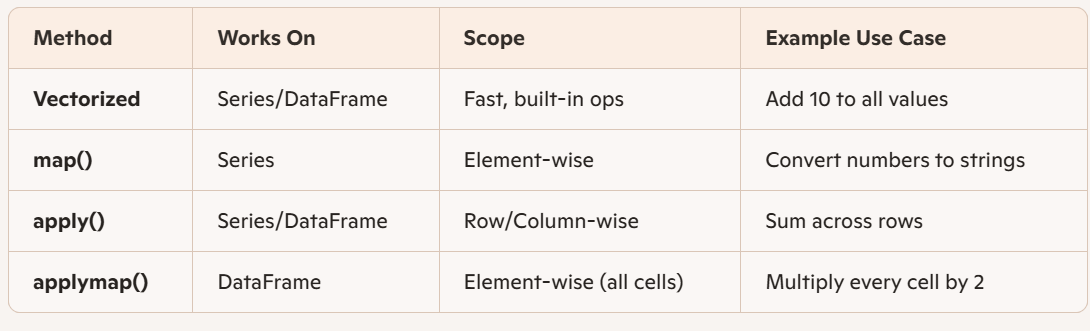

# Sorting and Filtering

In [73]:
df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "Score": [88, 95, 70]
})

# Sort by one column (ascending)
print(df.sort_values("Age"))
print()

# Sort by one column (descending)
print(df.sort_values("Score", ascending=False))
print()

# Sort by multiple columns
print(df.sort_values(["Age","Score"], ascending=[True, False]))


      Name  Age  Score
0    Alice   25     88
1      Bob   30     95
2  Charlie   35     70

      Name  Age  Score
1      Bob   30     95
0    Alice   25     88
2  Charlie   35     70

      Name  Age  Score
0    Alice   25     88
1      Bob   30     95
2  Charlie   35     70


In [75]:
# Default index sort (ascending)
print(df.sort_index())
print()

# Descending index sort
print(df.sort_index(ascending=False))


      Name  Age  Score
0    Alice   25     88
1      Bob   30     95
2  Charlie   35     70

      Name  Age  Score
2  Charlie   35     70
1      Bob   30     95
0    Alice   25     88


In [76]:
# Filter students with Score > 80, then sort by Age
result = df[df["Score"] > 80].sort_values("Age")
print(result)

    Name  Age  Score
0  Alice   25     88
1    Bob   30     95


# Grouping and Aggregation

The groupby() Process
The workflow is often described as: **Split → Apply → Combine**

* Split: Divide data into groups based on column(s).

* Apply: Perform aggregation or transformation.

* Combine: Return a new DataFrame/Series.

In [80]:
df = pd.DataFrame({
    "Department": ["HR", "HR", "IT", "IT", "Finance"],
    "Employee": ["Alice", "Bob", "Charlie", "David", "Eva"],
    "Salary": [50000, 60000, 70000, 80000, 75000],
    "Bonus": [5000, 7000, 8000, 9000, 6000]
})
df


,Department,Employee,Salary,Bonus
0,HR,Alice,50000,5000
1,HR,Bob,60000,7000
2,IT,Charlie,70000,8000
3,IT,David,80000,9000
4,Finance,Eva,75000,6000


In [81]:
# Group by one column and aggregate
print(df.groupby("Department")["Salary"].mean())

Department
Finance    75000.0
HR         55000.0
IT         75000.0
Name: Salary, dtype: float64


In [82]:
print(df.groupby("Department")["Salary"].agg(["mean", "max", "min"]))

               mean    max    min
Department                       
Finance     75000.0  75000  75000
HR          55000.0  60000  50000
IT          75000.0  80000  70000


In [83]:
print(df.groupby("Department").agg({
    "Salary": "mean",
    "Bonus": "sum"
}))

             Salary  Bonus
Department                
Finance     75000.0   6000
HR          55000.0  12000
IT          75000.0  17000


In [84]:
# Group by Department and Bonus
print(df.groupby(["Department","Bonus"])["Salary"].mean())


Department  Bonus
Finance     6000     75000.0
HR          5000     50000.0
            7000     60000.0
IT          8000     70000.0
            9000     80000.0
Name: Salary, dtype: float64


In [87]:
# Aggregation
print(df.groupby("Department")["Salary"].mean())
print()

# Transformation (broadcasts result back)
print(df.groupby("Department")["Salary"].transform("mean"))


Department
Finance    75000.0
HR         55000.0
IT         75000.0
Name: Salary, dtype: float64

0    55000.0
1    55000.0
2    75000.0
3    75000.0
4    75000.0
Name: Salary, dtype: float64


Aggregation (agg) → reduces values (e.g., mean, sum).

Transformation (transform) → returns same shape as original.We can use to create a new column in data frame

Group employees by "Department" and calculate the average salary.

Group by "Department" and calculate both sum of Salary and sum of Bonus.

Add a new column showing each employee’s salary compared to their department’s average salary (hint: transform).

Group by "Department" and find the employee with the maximum salary.

In [90]:
df.groupby('Department')['Salary'].mean()

,Salary
Department,
Finance,75000.0
HR,55000.0
IT,75000.0


In [91]:
df.groupby('Department').agg({'Salary':"mean",'Bonus':"sum"})

,Salary,Bonus
Department,,
Finance,75000.0,6000
HR,55000.0,12000
IT,75000.0,17000


In [92]:
df["Dept_Avg_Salary"] = df.groupby("Department")["Salary"].transform("mean")

# Difference from department average
df["Salary_vs_Avg"] = df["Salary"] - df["Dept_Avg_Salary"]

print(df)

  Department Employee  Salary  Bonus  Dept_Avg_Salary  Salary_vs_Avg
0         HR    Alice   50000   5000          55000.0        -5000.0
1         HR      Bob   60000   7000          55000.0         5000.0
2         IT  Charlie   70000   8000          75000.0        -5000.0
3         IT    David   80000   9000          75000.0         5000.0
4    Finance      Eva   75000   6000          75000.0            0.0


In [93]:
idx = df.groupby("Department")["Salary"].idxmax()

# Use .loc to get those rows
max_salary_employees = df.loc[idx, ["Department","Employee","Salary"]]
print(max_salary_employees)

  Department Employee  Salary
4    Finance      Eva   75000
1         HR      Bob   60000
3         IT    David   80000


# Reshaping

In [94]:
df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Alice", "Bob"],
    "Subject": ["Math", "Math", "Science", "Science"],
    "Score": [85, 90, 95, 80]
})
df


,Name,Subject,Score
0,Alice,Math,85
1,Bob,Math,90
2,Alice,Science,95
3,Bob,Science,80


In [95]:
# Pivot: Rearranges data from long → wide format.
#Fails in case of duplicate entries
pivot_df = df.pivot(index="Name", columns="Subject", values="Score")
print(pivot_df)

Subject  Math  Science
Name                  
Alice      85       95
Bob        90       80


In [97]:
pivot_table = df.pivot_table(index="Name", columns="Subject", values="Score", aggfunc="mean")
pivot_table

Subject,Math,Science
Name,,
Alice,85.0,95.0
Bob,90.0,80.0


In [98]:
#melt-> wide to long
melted = pivot_df.reset_index().melt(id_vars="Name", var_name="Subject", value_name="Score")
print(melted)

    Name  Subject  Score
0  Alice     Math     85
1    Bob     Math     90
2  Alice  Science     95
3    Bob  Science     80


In [100]:
#stack: col->rows
stacked = pivot_df.stack()
print(stacked)
print()

#unstack: rows->col
unstacked = stacked.unstack()
print(unstacked)


Name   Subject
Alice  Math       85
       Science    95
Bob    Math       90
       Science    80
dtype: int64

Subject  Math  Science
Name                  
Alice      85       95
Bob        90       80


# Merging and Joining

In [104]:
df1 = pd.DataFrame({"A":[1,2], "B":[3,4]})
df2 = pd.DataFrame({"A":[5,6], "B":[7,8]})
print(df1)
print()
print(df2)

   A  B
0  1  3
1  2  4

   A  B
0  5  7
1  6  8


In [106]:

# Vertical stack
concat_df = pd.concat([df1, df2], axis=0)
print(concat_df)
print()

# Horizontal stack
concat_df_h = pd.concat([df1, df2], axis=1)
print(concat_df_h)

   A  B
0  1  3
1  2  4
0  5  7
1  6  8

   A  B  A  B
0  1  3  5  7
1  2  4  6  8


In [114]:
employees = pd.DataFrame({
    "EmpID": [1,2,3],
    "Name": ["Alice","Bob","Charlie"]
})

salaries = pd.DataFrame({
    "EmpID": [1,2,4],
    "Salary": [50000,60000,70000]
})

print(employees)
print()
print(salaries)


   EmpID     Name
0      1    Alice
1      2      Bob
2      3  Charlie

   EmpID  Salary
0      1   50000
1      2   60000
2      4   70000


In [109]:
# Inner join (only matching EmpID)
merged_inner = pd.merge(employees, salaries, on="EmpID", how="inner")
merged_inner

,EmpID,Name,Salary
0,1,Alice,50000
1,2,Bob,60000


In [110]:
# Left join (all employees, salaries if available)
merged_left = pd.merge(employees, salaries, on="EmpID", how="left")
merged_left

,EmpID,Name,Salary
0,1,Alice,50000.0
1,2,Bob,60000.0
2,3,Charlie,NaN


In [113]:
# Outer join (all records from both)
merged_outer = pd.merge(employees, salaries, on="EmpID", how="outer")
merged_outer

,EmpID,Name,Salary
0,1,Alice,50000.0
1,2,Bob,60000.0
2,3,Charlie,NaN
3,4,NaN,70000.0


In [115]:
#Join the basis of index

df_a = pd.DataFrame({"Age":[25,30]}, index=["Alice","Bob"])
df_b = pd.DataFrame({"Score":[85,90]}, index=["Alice","Bob"])

print(df_a)
print()
print(df_b)

joined = df_a.join(df_b)
print(joined)


       Age
Alice   25
Bob     30

       Score
Alice     85
Bob       90
       Age  Score
Alice   25     85
Bob     30     90


# Window Functions

In [116]:
#rolling
s = pd.Series([10, 20, 30, 40, 50])

# Rolling mean with window size 3
print(s.rolling(window=3).mean())

# Rolling sum
print(s.rolling(window=2).sum())


0     NaN
1     NaN
2    20.0
3    30.0
4    40.0
dtype: float64
0     NaN
1    30.0
2    50.0
3    70.0
4    90.0
dtype: float64


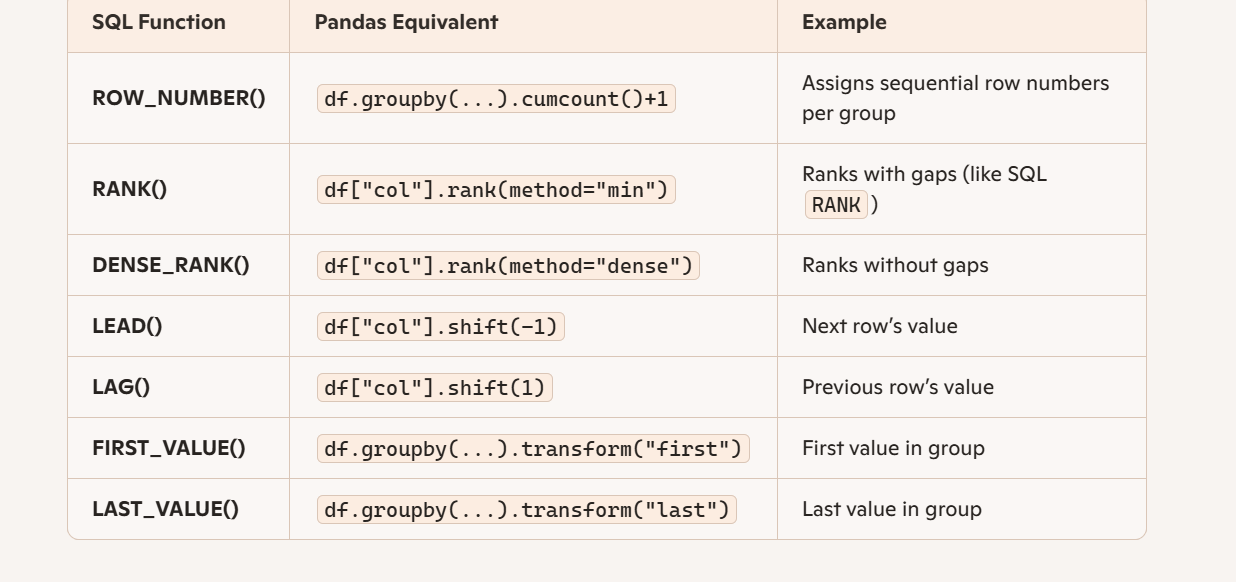

In [117]:
import pandas as pd

df = pd.DataFrame({
    "Department": ["HR","HR","IT","IT","Finance"],
    "Employee": ["Alice","Bob","Charlie","David","Eva"],
    "Salary": [50000,60000,70000,80000,75000]
})

df

,Department,Employee,Salary
0,HR,Alice,50000
1,HR,Bob,60000
2,IT,Charlie,70000
3,IT,David,80000
4,Finance,Eva,75000


In [119]:
# ROW_NUMBER equivalent
df["RowNum"] = df.groupby("Department").cumcount() + 1
df

,Department,Employee,Salary,RowNum
0,HR,Alice,50000,1
1,HR,Bob,60000,2
2,IT,Charlie,70000,1
3,IT,David,80000,2
4,Finance,Eva,75000,1


In [120]:
# RANK
df["Rank"] = df["Salary"].rank(method="min", ascending=False)
df

,Department,Employee,Salary,RowNum,Rank
0,HR,Alice,50000,1,5.0
1,HR,Bob,60000,2,4.0
2,IT,Charlie,70000,1,3.0
3,IT,David,80000,2,1.0
4,Finance,Eva,75000,1,2.0


In [121]:
# LAG (previous salary)
df["LagSalary"] = df["Salary"].shift(1)
df

,Department,Employee,Salary,RowNum,Rank,LagSalary
0,HR,Alice,50000,1,5.0,NaN
1,HR,Bob,60000,2,4.0,50000.0
2,IT,Charlie,70000,1,3.0,60000.0
3,IT,David,80000,2,1.0,70000.0
4,Finance,Eva,75000,1,2.0,80000.0


In [122]:
# DENSE_RANK
df["DenseRank"] = df["Salary"].rank(method="dense", ascending=False)
df


,Department,Employee,Salary,RowNum,Rank,LagSalary,DenseRank
0,HR,Alice,50000,1,5.0,NaN,5.0
1,HR,Bob,60000,2,4.0,50000.0,4.0
2,IT,Charlie,70000,1,3.0,60000.0,3.0
3,IT,David,80000,2,1.0,70000.0,1.0
4,Finance,Eva,75000,1,2.0,80000.0,2.0


In [123]:
# LEAD (next salary)
df["LeadSalary"] = df["Salary"].shift(-1)
df

,Department,Employee,Salary,RowNum,Rank,LagSalary,DenseRank,LeadSalary
0,HR,Alice,50000,1,5.0,NaN,5.0,60000.0
1,HR,Bob,60000,2,4.0,50000.0,4.0,70000.0
2,IT,Charlie,70000,1,3.0,60000.0,3.0,80000.0
3,IT,David,80000,2,1.0,70000.0,1.0,75000.0
4,Finance,Eva,75000,1,2.0,80000.0,2.0,NaN


In [124]:
# FIRST_VALUE per department
df["FirstSalary"] = df.groupby("Department")["Salary"].transform("first")
df

,Department,Employee,Salary,RowNum,Rank,LagSalary,DenseRank,LeadSalary,FirstSalary
0,HR,Alice,50000,1,5.0,NaN,5.0,60000.0,50000
1,HR,Bob,60000,2,4.0,50000.0,4.0,70000.0,50000
2,IT,Charlie,70000,1,3.0,60000.0,3.0,80000.0,70000
3,IT,David,80000,2,1.0,70000.0,1.0,75000.0,70000
4,Finance,Eva,75000,1,2.0,80000.0,2.0,NaN,75000


In [125]:
# LAST_VALUE per department
df["LastSalary"] = df.groupby("Department")["Salary"].transform("last")
df

,Department,Employee,Salary,RowNum,Rank,LagSalary,DenseRank,LeadSalary,FirstSalary,LastSalary
0,HR,Alice,50000,1,5.0,NaN,5.0,60000.0,50000,60000
1,HR,Bob,60000,2,4.0,50000.0,4.0,70000.0,50000,60000
2,IT,Charlie,70000,1,3.0,60000.0,3.0,80000.0,70000,80000
3,IT,David,80000,2,1.0,70000.0,1.0,75000.0,70000,80000
4,Finance,Eva,75000,1,2.0,80000.0,2.0,NaN,75000,75000


# String manipulation

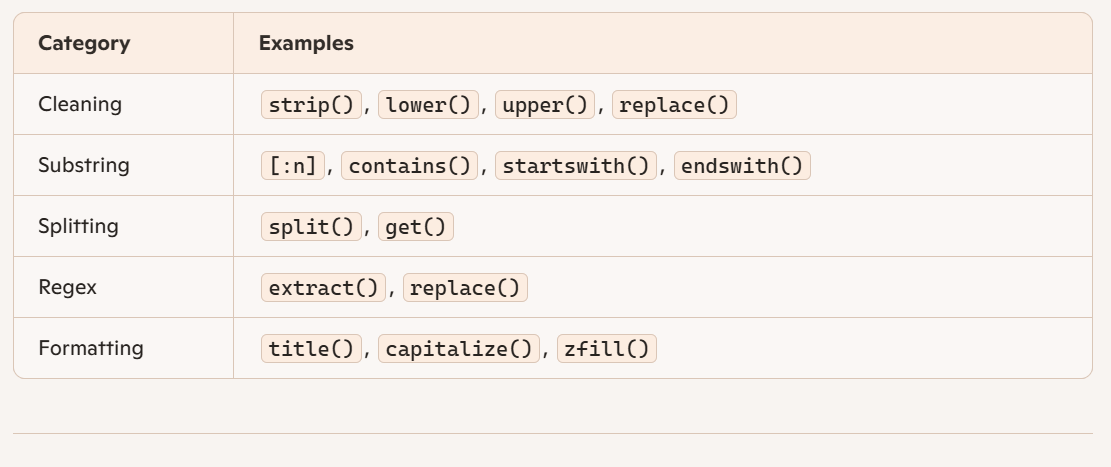

Clean a Series [" apple ", "Banana", "CHERRY "] → strip spaces + lowercase.

From ["Alice123", "Bob456", "Charlie789"], extract only the numbers.

From ["NY-USA", "LA-USA", "Paris-FR"], split by "-" and get the country code.

Convert ["john doe", "jane SMITH"] into proper title case (John Doe, Jane Smith).

In [128]:
s=pd.Series([" apple ", "Banana", "CHERRY "])
print(s.str.strip())
print(s.str.lower())
print(s.str.upper())

0     apple
1    Banana
2    CHERRY
dtype: object
0     apple 
1     banana
2    cherry 
dtype: object
0     APPLE 
1     BANANA
2    CHERRY 
dtype: object


In [130]:
s=pd.Series(["Alice123", "Bob456", "Charlie789"])
result=s.str.extract("(\d+)")
print(result)

     0
0  123
1  456
2  789


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-800046556.py:2: SyntaxWarning: invalid escape sequence '\d'
  result=s.str.extract("(\d+)")


In [141]:
s=pd.Series(["NY-USA", "LA-USA", "Paris-FR"])
s.str.split("-")

,0
0,"[NY, USA]"
1,"[LA, USA]"
2,"[Paris, FR]"


In [145]:
s.apply(lambda x:x[-1])

,0
0,A
1,A
2,R


In [138]:
st=pd.Series( ["john doe", "jane SMITH"])
st.str.title()

,0
0,John Doe
1,Jane Smith


# Date and Time

In [146]:
# Convert string to datetime
dates = pd.to_datetime(["2025-01-01", "2025-02-15", "2025-03-10"])
print(dates)

DatetimeIndex(['2025-01-01', '2025-02-15', '2025-03-10'], dtype='datetime64[ns]', freq=None)


In [147]:
# Single timestamp
ts = pd.to_datetime("2025-11-25 14:30")
print(ts)

2025-11-25 14:30:00


In [148]:
#Daily
print(pd.date_range(start="2025-01-01", end="2025-01-10"))

# Monthly range
print(pd.date_range(start="2025-01-01", periods=5, freq="M"))

# Hourly range
print(pd.date_range(start="2025-01-01", periods=6, freq="H"))

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
               '2025-05-31'],
              dtype='datetime64[ns]', freq='ME')
DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 01:00:00',
               '2025-01-01 02:00:00', '2025-01-01 03:00:00',
               '2025-01-01 04:00:00', '2025-01-01 05:00:00'],
              dtype='datetime64[ns]', freq='h')


/tmp/ipython-input-3192994623.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  print(pd.date_range(start="2025-01-01", periods=5, freq="M"))
/tmp/ipython-input-3192994623.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  print(pd.date_range(start="2025-01-01", periods=6, freq="H"))


In [150]:
df = pd.DataFrame({"Date": pd.to_datetime(["2025-01-01", "2025-02-15", "2025-03-10"])})

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.day_name()
df["Quarter"] = df["Date"].dt.quarter


In [151]:
print(df["Year"])
print(df["Month"])
print(df["Day"])
print(df["Weekday"])
print(df["Quarter"])

0    2025
1    2025
2    2025
Name: Year, dtype: int32
0    1
1    2
2    3
Name: Month, dtype: int32
0     1
1    15
2    10
Name: Day, dtype: int32
0    Wednesday
1     Saturday
2       Monday
Name: Weekday, dtype: object
0    1
1    1
2    1
Name: Quarter, dtype: int32


# Multi Index

In [152]:
arrays = [
    ["HR", "HR", "IT", "IT", "Finance"],
    ["Alice", "Bob", "Charlie", "David", "Eva"]
]

index = pd.MultiIndex.from_arrays(arrays, names=("Department", "Employee"))

df = pd.DataFrame({"Salary": [50000, 60000, 70000, 80000, 75000]}, index=index)
print(df)


                     Salary
Department Employee        
HR         Alice      50000
           Bob        60000
IT         Charlie    70000
           David      80000
Finance    Eva        75000


In [154]:
tuples = [
    ("HR", "Alice"),
    ("HR", "Bob"),
    ("IT", "Charlie"),
    ("IT", "David"),
    ("Finance", "Eva")
]

index = pd.MultiIndex.from_tuples(tuples, names=("Department", "Employee"))
df = pd.DataFrame({"Salary": [50000, 60000, 70000, 80000, 75000]}, index=index)
df

Salary
Department Employee        
HR         Alice      50000
           Bob        60000
IT         Charlie    70000
           David      80000
Finance    Eva        75000

In [155]:
# Access by label
print(df.loc["HR"])          # all HR employees
print(df.loc[("HR","Alice")]) # specific employee

# Slice across levels
print(df.loc[("IT", slice(None)), :])  # all IT employees


          Salary
Employee        
Alice      50000
Bob        60000
Salary    50000
Name: (HR, Alice), dtype: int64
                     Salary
Department Employee        
IT         Charlie    70000
           David      80000


In [157]:
# Reset MultiIndex to columns
df_reset = df.reset_index()
print(df_reset)

# Swap levels
df_swapped = df.swaplevel("Department","Employee")
print(df_swapped)


                     Salary
Employee Department        
Alice    HR           50000
Bob      HR           60000
Charlie  IT           70000
David    IT           80000
Eva      Finance      75000
